In [1]:
import numpy as np

from tslearn.clustering import TimeSeriesKMeans

import matplotlib.pyplot as plt

/home/piotr/miniconda3/envs/mlenv/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
dataset = np.load('../perfumes-dataset-04-05-2024.npz', allow_pickle=True)['data'].tolist()

dataset = [d for d in dataset if 'sauvage' not in d['name'] and 'powietrze' not in d['name']]


In [3]:
signals = [d['data'] for d in dataset]

In [4]:
signals_array = np.array(signals)

print('Signals shape:', signals_array.shape)

Signals shape: (16, 8, 4, 10, 101)


# Get resistancy signals

In [5]:
resistances = signals_array[:, :, 0, :]

In [6]:
resistances.shape

(16, 8, 10, 101)

In [7]:
resistances[resistances<7000] # all g

array([], dtype=float64)

In [8]:
resistances

array([[[[7.54371200e+07, 8.02154240e+07, 8.43992240e+07, ...,
          1.02400000e+08, 1.02400000e+08, 1.02400000e+08],
         [8.39344300e+06, 8.47813700e+06, 8.57127900e+06, ...,
          1.04489800e+07, 1.04489800e+07, 1.04489800e+07],
         [6.19854750e+05, 6.19854750e+05, 6.23819688e+05, ...,
          7.05720188e+05, 7.05720188e+05, 7.05720188e+05],
         ...,
         [3.80881531e+05, 3.90243906e+05, 4.00078125e+05, ...,
          4.33622688e+05, 4.33622688e+05, 4.33622688e+05],
         [4.23665688e+05, 4.38919844e+05, 4.46673938e+05, ...,
          4.98539438e+05, 4.98539438e+05, 4.98539438e+05],
         [4.41760125e+05, 4.57449188e+05, 4.65243062e+05, ...,
          5.15869031e+05, 5.15869031e+05, 5.15869031e+05]],

        [[8.16393680e+07, 8.42365040e+07, 8.90434800e+07, ...,
          1.02400000e+08, 1.02400000e+08, 1.02400000e+08],
         [6.17332350e+06, 6.13862850e+06, 6.15592700e+06, ...,
          8.36131650e+06, 8.36131650e+06, 8.36131650e+06],
        

In [9]:
resistances.shape

(16, 8, 10, 101)

In [10]:
resistances_ = []
for perf in resistances:
    reshaped_resistancy = np.row_stack(perf)
    resistances_.append(reshaped_resistancy)

resistances = np.array(resistances_)

In [11]:
resistances.shape

(16, 80, 101)

# Prepare dataset and labels for clustering

In [12]:
labels = [d['name'] for d in dataset]
X = []
y = []
for res, lab in zip(resistances, labels):
    X.append(res)
    if lab == 'powietrze':
        lab = 'air'
    y.append([lab]*80)
X = np.row_stack(np.array(X))
y = np.array(y).flatten()



In [13]:
X.shape, y.shape

((1280, 101), (1280,))

In [14]:
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMinMax, TimeSeriesScalerMeanVariance

X = to_time_series_dataset(X)
tss = TimeSeriesScalerMeanVariance()
X = tss.fit_transform(X)

In [15]:
X.shape

(1280, 101, 1)

In [16]:
from tslearn.clustering import TimeSeriesKMeans, KernelKMeans

kts = TimeSeriesKMeans(n_clusters= 17, n_jobs=-1, max_iter = 1000, verbose = True, random_state=42)

# kts = KernelKMeans(n_clusters= 16, n_jobs = -1)

kts = kts.fit(X)

12.775 --> 8.887 --> 8.633 --> 8.563 --> 8.531 --> 8.518 --> 8.507 --> 8.493 --> 8.462 --> 8.430 --> 8.425 --> 8.425 --> 


In [17]:
np.unique(y)

array(['fake_euphoria_bg', 'fake_euphoria_sam', 'fake_goodgirl_bg',
       'fake_goodgirl_sam', 'fake_theone_bg', 'fake_theone_sam',
       'fake_ysly_bg', 'fake_ysly_sam', 'og_euphoria_bg',
       'og_euphoria_sam', 'og_goodgirl_bg', 'og_goodgirl_sam',
       'og_theone_bg', 'og_theone_sam', 'og_ysly_bg', 'og_ysly_sam'],
      dtype='<U17')

In [18]:
color_dict = {
    'og_goodgirl_sam': 'blue',
    'fake_euphoria_sam': 'orange',
    'og_theone_bg': 'green',
    'og_theone_sam': 'red',
    'fake_theone_sam': 'purple',
    'fake_euphoria_bg': 'yellow',
    'fake_sauvage_bg': 'cyan',
    'og_ysly_bg': 'magenta',
    'fake_sauvage_sam': 'lime',
    'fake_goodgirl_bg': 'pink',
    'og_goodgirl_bg': 'teal',
    'fake_goodgirl_sam': 'brown',
    'og_euphoria_bg': 'olive',
    'og_euphoria_sam': 'navy',
    'fake_theone_bg': 'maroon',
    'og_ysly_sam': 'gold',
    'fake_ysly_bg': 'gray',
    'fake_ysly_sam': 'silver',
    'air': '#b5f7e0'
    
}

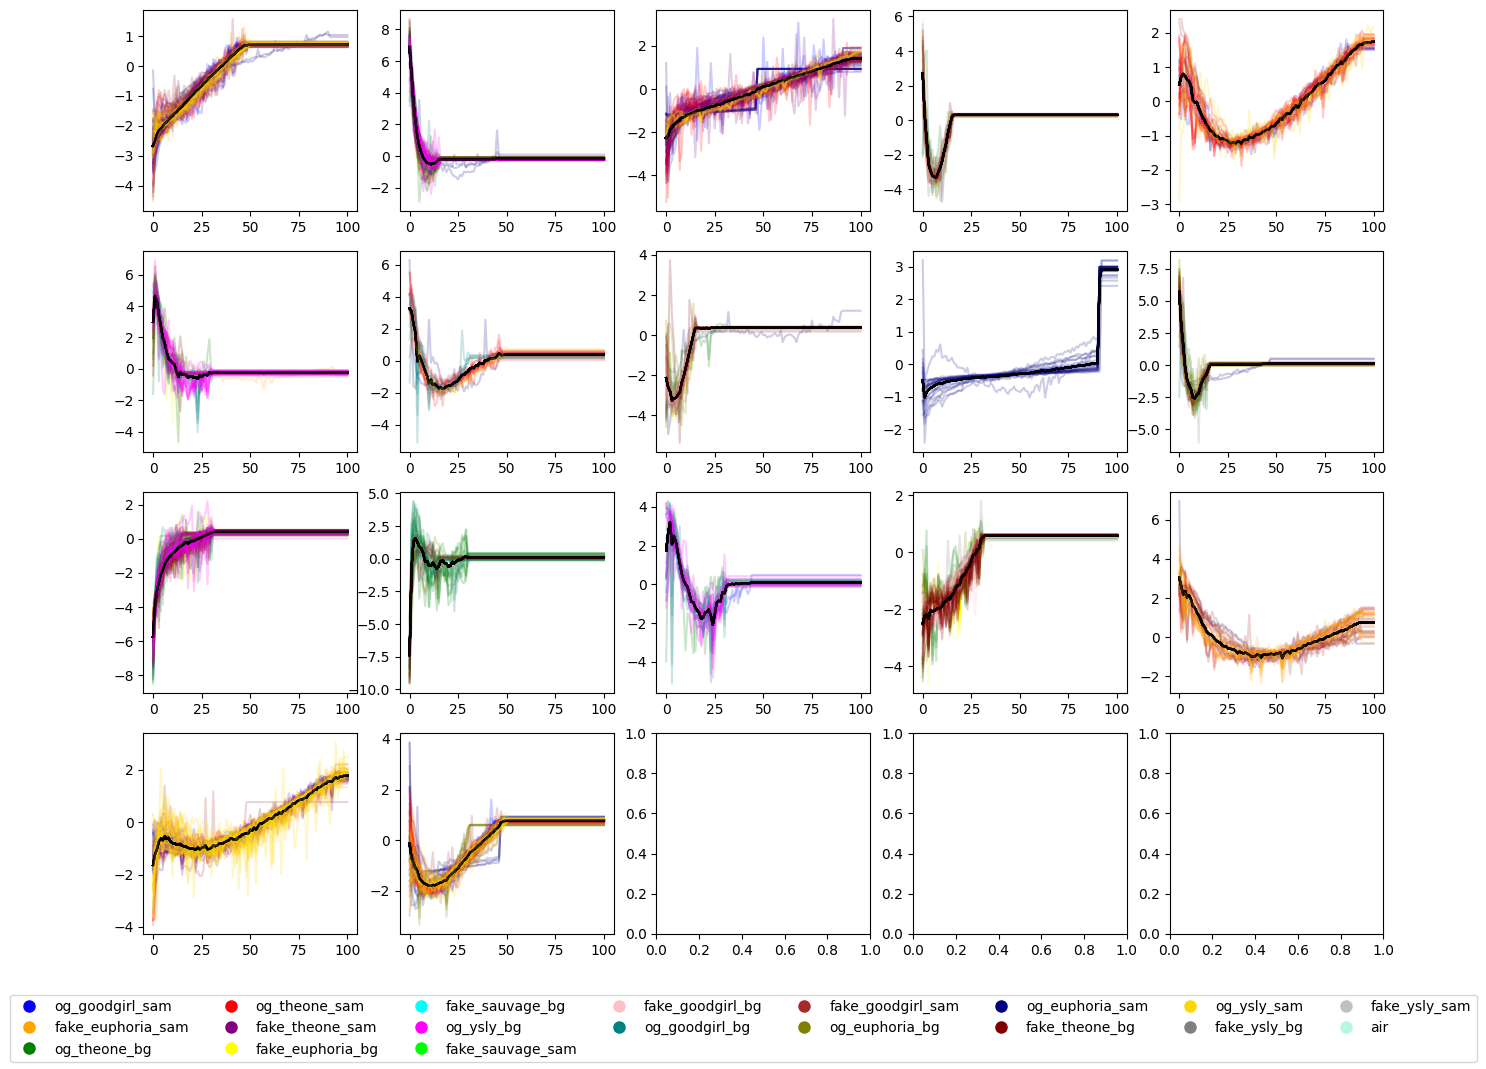

In [19]:
fig, axes = plt.subplots(4, 5, figsize=(16, 12))
axes = axes.flatten()

for x, lab in zip(X, y):
    y_pred = kts.predict(x.reshape((1, 101, 1)))
    assigned_centroid = kts.cluster_centers_[y_pred]
    
    axes[y_pred[0]].plot(assigned_centroid.squeeze(), color = 'black')
    
    color = color_dict[lab]
    axes[y_pred[0]].plot(x, color = color, alpha = 0.2)

handles = []
labels = []

for label, color in color_dict.items():
    handles.append(plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = color, markersize = 10))
    labels.append(label)

fig.legend(handles, labels, loc='lower center', ncols = 8)
# fig.suptitle('Clustering with TSeriesKmeans \n k = 16')


    

# Draw results without bg-sample partition

In [20]:
np.unique(y)

array(['fake_euphoria_bg', 'fake_euphoria_sam', 'fake_goodgirl_bg',
       'fake_goodgirl_sam', 'fake_theone_bg', 'fake_theone_sam',
       'fake_ysly_bg', 'fake_ysly_sam', 'og_euphoria_bg',
       'og_euphoria_sam', 'og_goodgirl_bg', 'og_goodgirl_sam',
       'og_theone_bg', 'og_theone_sam', 'og_ysly_bg', 'og_ysly_sam'],
      dtype='<U17')

In [21]:
mapping = {'fake_euphoria_bg': 'fake_euphoria',
           'fake_euphoria_sam': 'fake_euphoria',
           'og_euphoria_bg': 'og_euphoria',
           'og_euphoria_sam': 'og_euphoria',
           'fake_goodgirl_bg': 'fake_goodgirl',
           'fake_goodgirl_sam': 'fake_goodgirl',
           'fake_sauvage_bg': 'fake_sauvage',
           'fake_sauvage_sam': 'fake_sauvage',
           'fake_theone_bg': 'fake_theone',
           'fake_theone_sam': 'fake_theone',
           'fake_ysly_bg': 'fake_ysly',
           'fake_ysly_sam': 'fake_ysly',
           'og_goodgirl_bg': 'og_goodgirl',
           'og_goodgirl_sam': 'og_goodgirl',
           'og_theone_bg': 'og_theone',
           'og_theone_sam': 'og_theone',
           'og_ysly_bg': 'og_ysly',
           'og_ysly_sam': 'og_ysly'}

new_color_dict = {
    'fake_euphoria': 'red',
    'og_euphoria': 'green',
    'fake_goodgirl': 'magenta',
    'og_goodgirl': 'cyan',
    'og_theone': 'lime',
    'fake_theone':'pink',
    'og_ysly': 'blue',
    'fake_ysly': 'silver',
    

}

y_ = np.array([mapping[label] for label in y])

In [22]:
np.unique(y_)

array(['fake_euphoria', 'fake_goodgirl', 'fake_theone', 'fake_ysly',
       'og_euphoria', 'og_goodgirl', 'og_theone', 'og_ysly'], dtype='<U13')

In [23]:
kts = TimeSeriesKMeans(n_clusters= 16, n_jobs=-1, max_iter = 1000, verbose = True, random_state=42)

kts = kts.fit(X)

13.497 --> 9.374 --> 9.073 --> 8.982 --> 8.941 --> 8.924 --> 8.912 --> 8.900 --> 8.889 --> 8.881 --> 8.881 --> 


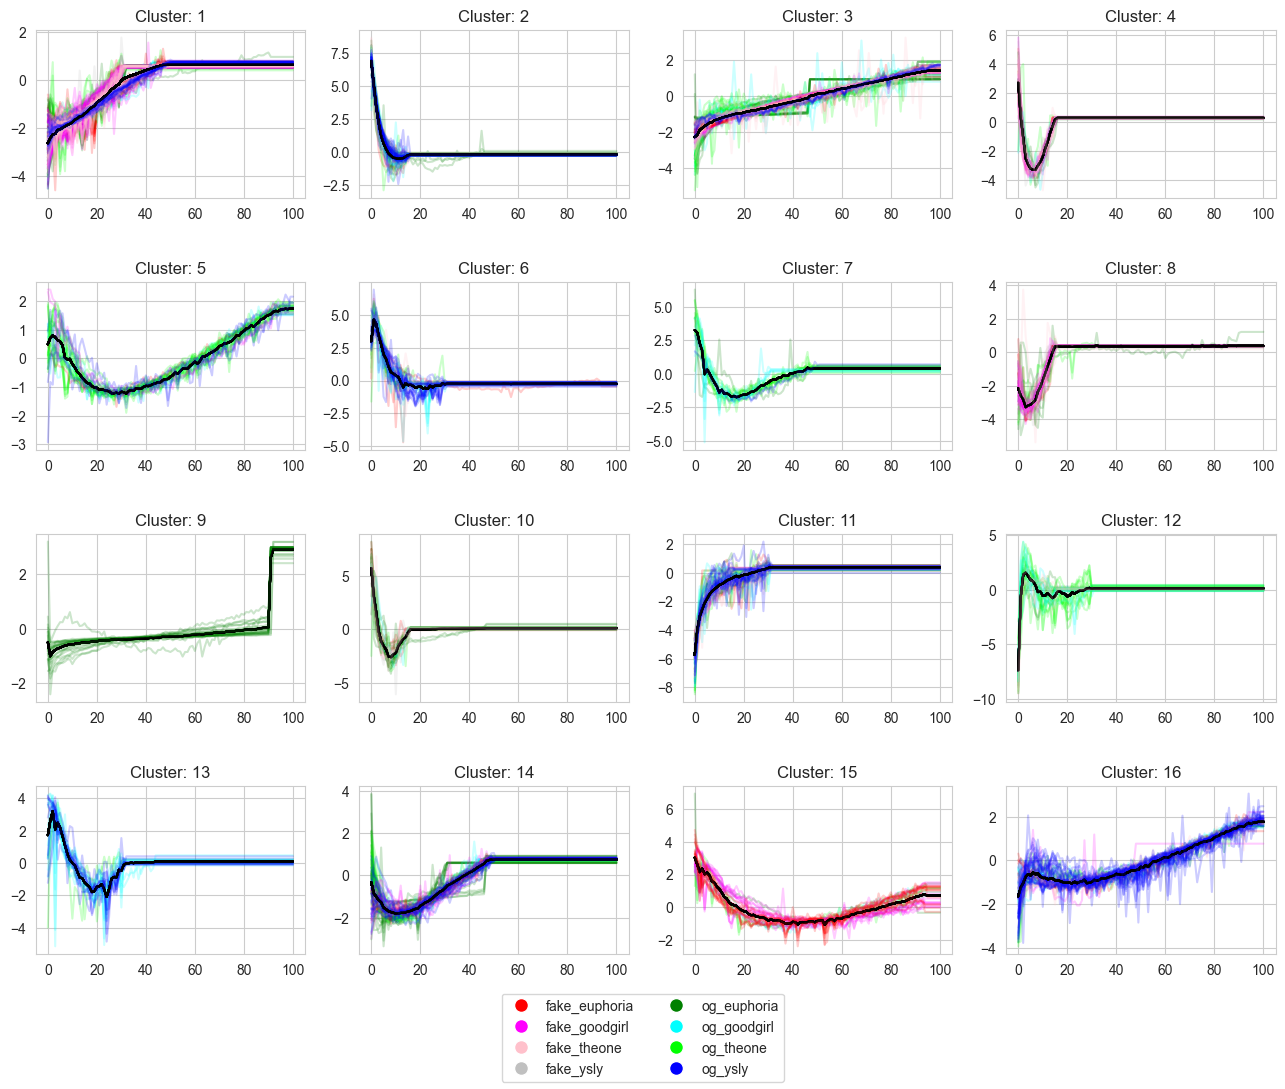

In [24]:
import seaborn as sns


sns.set_style('whitegrid')

fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()


plt.subplots_adjust(hspace = 0.5)
for x, lab in zip(X, y_):
    y_pred = kts.predict(x.reshape((1, 101, 1)))
    assigned_centroid = kts.cluster_centers_[y_pred]
    
    axes[y_pred[0]].plot(assigned_centroid.squeeze(), color = 'black')
    
    color = new_color_dict[lab]
    axes[y_pred[0]].plot(x, color = color, alpha = 0.2)

for i, ax in enumerate(axes):
    ax.set_title(f'Cluster: {i+1}')


handles = []
labels = []

for label, color in dict(sorted(new_color_dict.items(), key=lambda x: x[0])).items():
    handles.append(plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = color, markersize = 10))
    labels.append(label)

fig.legend(handles, labels, loc='lower center', ncols = 2)

    

In [25]:
kts = TimeSeriesKMeans(n_clusters= 16, n_jobs=-1, metric='dtw', max_iter = 1000, verbose = True, random_state=42)

kts = kts.fit(X)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=

5.739 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

4.249 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

4.105 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

4.068 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

4.030 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

4.017 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

4.000 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.985 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.964 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.950 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.938 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.930 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.923 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.915 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.909 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.904 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.902 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.902 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.901 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.901 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.901 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.901 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.901 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.901 --> 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

3.901 --> 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 11234 tasks  

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parall

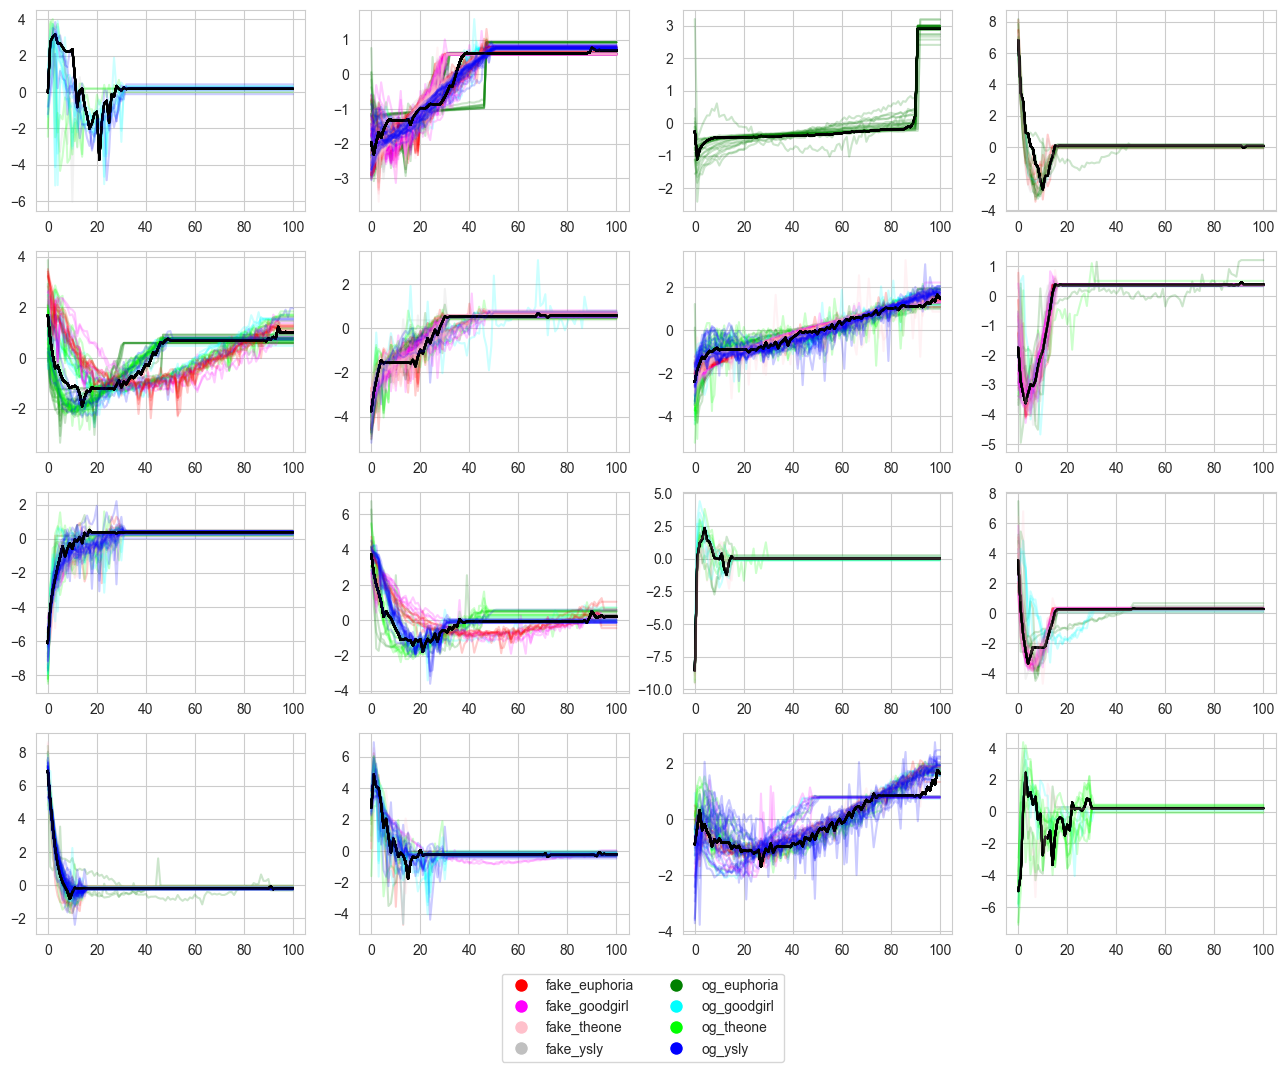

In [26]:
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()

for x, lab in zip(X, y_):
    y_pred = kts.predict(x.reshape((1, 101, 1)))
    assigned_centroid = kts.cluster_centers_[y_pred]
    
    axes[y_pred[0]].plot(assigned_centroid.squeeze(), color = 'black')
    
    color = new_color_dict[lab]
    axes[y_pred[0]].plot(x, color = color, alpha = 0.2)

handles = []
labels = []

for label, color in dict(sorted(new_color_dict.items(), key=lambda x: x[0])).items():
    handles.append(plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = color, markersize = 10))
    labels.append(label)

fig.legend(handles, labels, loc='lower center', ncols = 2)

    